In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [66]:
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

In [3]:
df = pd.read_csv('titanic_toy.csv')
df.sample()

,Age,Fare,Family,Survived
367,NaN,7.2292,0,1


In [4]:
df.isnull().sum()

Age         177
Fare         45
Family        0
Survived      0
dtype: int64

In [6]:
X = df.drop(columns=['Survived'])
y = df['Survived']

In [7]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)
X_train.shape,X_test.shape

((712, 3), (179, 3))

In [13]:
X_train['Age_plus'] = X_train['Age'].fillna(99)
X_train['Age_minus1'] = X_train['Age'].fillna(-1)

X_train['Fare_plus'] = X_train['Fare'].fillna(999)
X_train['Fare_minus1'] = X_train['Fare'].fillna(-1)

X_train.sample(5)

,Age,Fare,Family,Age_plus,Age_minus1,Fare_plus,Fare_minus1
569,32.0,7.8542,0,32.0,32.0,7.8542,7.8542
116,70.5,7.7500,0,70.5,70.5,7.7500,7.7500
863,NaN,69.5500,10,99.0,-1.0,69.5500,69.5500
492,55.0,30.5000,0,55.0,55.0,30.5000,30.5000
848,28.0,33.0000,1,28.0,28.0,33.0000,33.0000


In [47]:
def CheckPlot(col):
    fig = plt.figure(figsize=(14,10))
    ax1 = plt.subplot(221)
    X_train[col].plot(kind='kde',color='red')
    X_train[f"{col}_plus"].plot(kind='kde',color='blue')
    X_train[f"{col}_minus1"].plot(kind='kde',color='green')

    plt.subplot(222)
    X_train[col].hist(color='red')
    plt.title(col)
    
    plt.subplot(223)
    X_train[f"{col}_plus"].hist(color='blue')
    plt.title(f"{col}_plus")
    
    plt.subplot(224)
    X_train[f"{col}_minus1"].hist(color='green')
    plt.title(f"{col}_minus1")
    

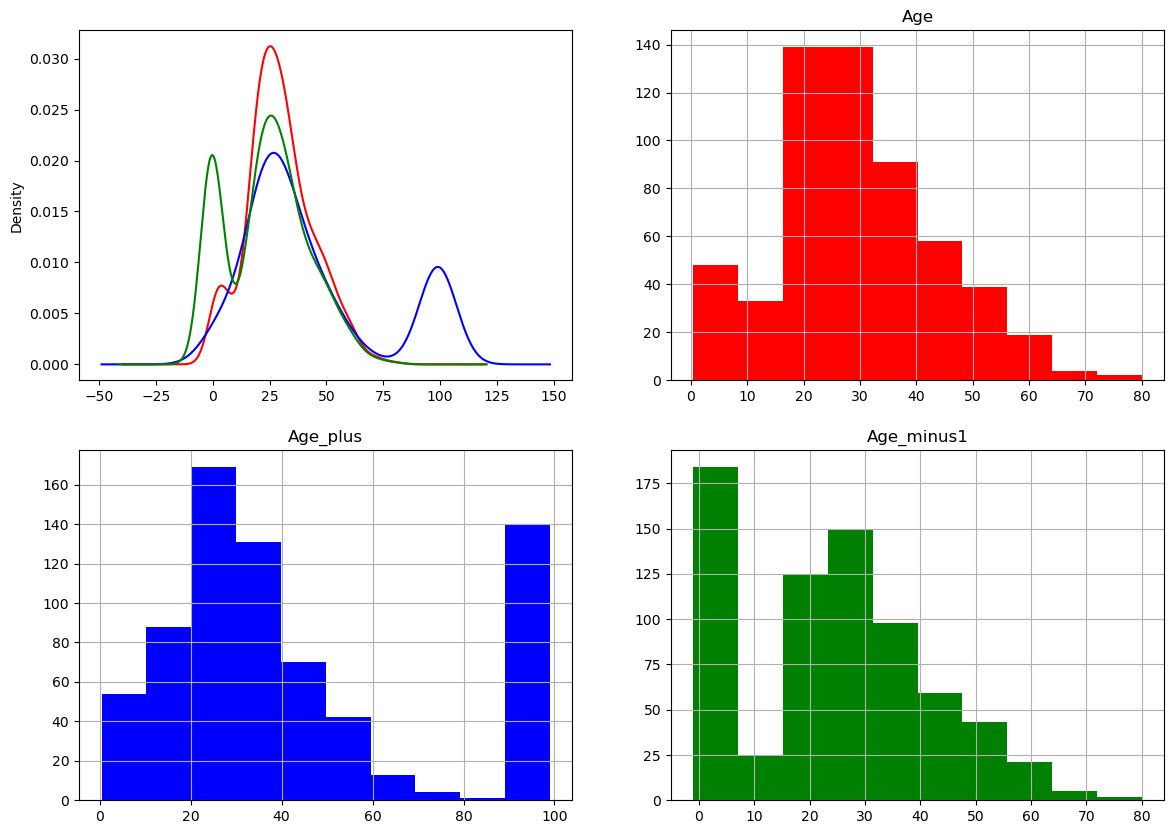

In [49]:
CheckPlot('Age')

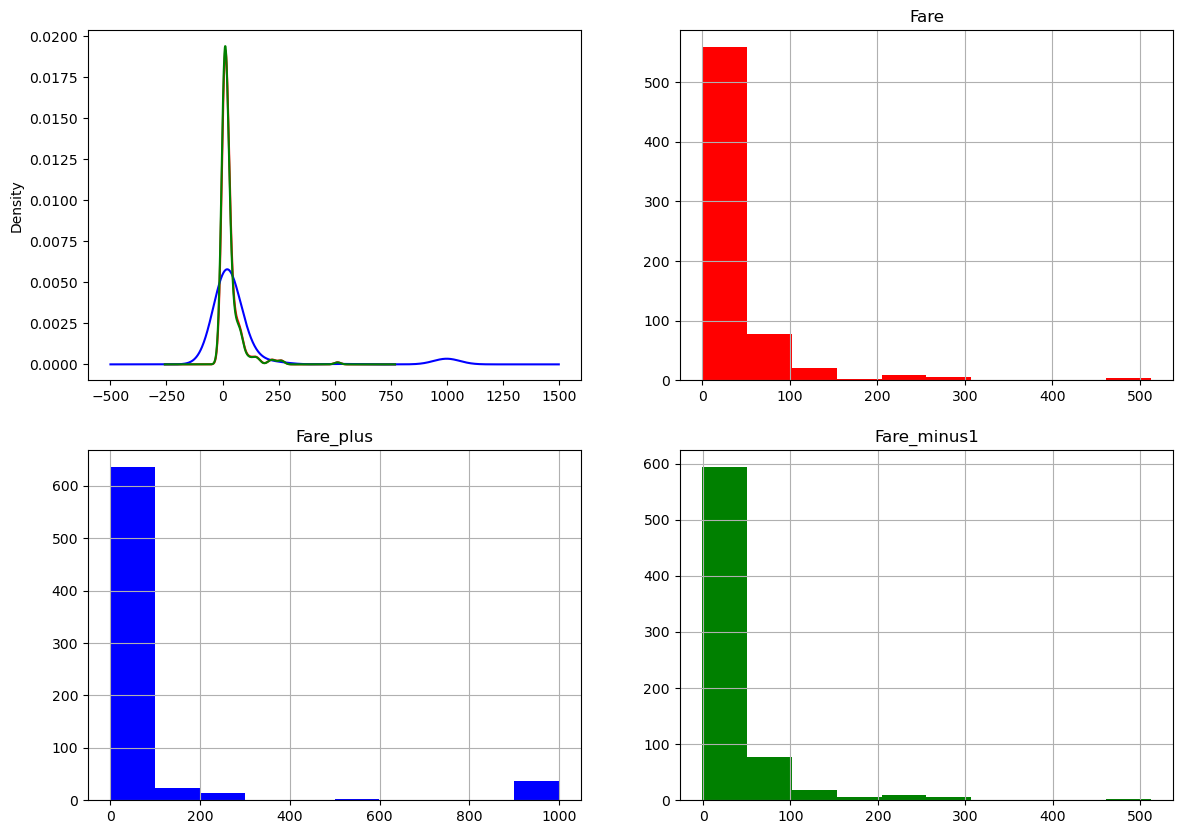

In [51]:
CheckPlot('Fare')

In [57]:
print('Original Age variable variance: ', X_train['Age'].var())
print('Age Variance after 99 wala imputation: ', X_train['Age_plus'].var())
print('Age Variance after -1 wala imputation: ', X_train['Age_minus1'].var())

print('Original Fare variable variance: ', X_train['Fare'].var())
print('Fare Variance after 999 wala imputation: ', X_train['Fare_plus'].var())
print('Fare Variance after -1 wala imputation: ', X_train['Fare_minus1'].var())

Original Age variable variance:  210.2517072477438
Age Variance after 99 wala imputation:  932.9665366701436
Age Variance after -1 wala imputation:  315.99550362600644
Original Fare variable variance:  2761.031434948639
Fare Variance after 999 wala imputation:  47525.47059536007
Fare Variance after -1 wala imputation:  2675.2394049177087


In [59]:
X_train.cov()

,Age,Fare,Family,Age_plus,Age_minus1,Fare_plus,Fare_minus1
Age,210.251707,75.481375,-6.993325,210.251707,210.251707,130.495777,69.137162
Fare,75.481375,2761.031435,18.599163,-111.965046,135.785804,2761.031435,2761.031435
Family,-6.993325,18.599163,2.830892,-6.941982,-5.034556,16.878492,17.684447
Age_plus,210.251707,-111.965046,-6.941982,932.966537,-166.460682,-255.051165,-101.137070
Age_minus1,210.251707,135.785804,-5.034556,-166.460682,315.995504,262.712284,124.270305
Fare_plus,130.495777,2761.031435,16.878492,-255.051165,262.712284,47525.470595,1063.944817
Fare_minus1,69.137162,2761.031435,17.684447,-101.137070,124.270305,1063.944817,2675.239405


In [61]:
X_train.corr()

,Age,Fare,Family,Age_plus,Age_minus1,Fare_plus,Fare_minus1
Age,1.000000,0.091482,-0.319651,1.000000,1.000000,0.039967,0.085422
Fare,0.091482,1.000000,0.207193,-0.069365,0.145071,1.000000,1.000000
Family,-0.319651,0.207193,1.000000,-0.135079,-0.168329,0.046016,0.203212
Age_plus,1.000000,-0.069365,-0.135079,1.000000,-0.306576,-0.038303,-0.064017
Age_minus1,1.000000,0.145071,-0.168329,-0.306576,1.000000,0.067792,0.135159
Fare_plus,0.039967,1.000000,0.046016,-0.038303,0.067792,1.000000,0.094357
Fare_minus1,0.085422,1.000000,0.203212,-0.064017,0.135159,0.094357,1.000000


# using Sklearn

In [96]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [98]:
trf = ColumnTransformer([
    ('impt1',SimpleImputer(strategy='constant',fill_value=99),['Age']),
    ('impt2',SimpleImputer(strategy='constant',fill_value=999),['Fare'])
],remainder='passthrough')

In [100]:
trf.fit(X_train)

ColumnTransformer(remainder='passthrough',
                  transformers=[('impt1',
                                 SimpleImputer(fill_value=99,
                                               strategy='constant'),
                                 ['Age']),
                                ('impt2',
                                 SimpleImputer(fill_value=999,
                                               strategy='constant'),
                                 ['Fare'])])

In [102]:
X_train = trf.transform(X_train)
X_test = trf.transform(X_test)
X_train

array([[ 40.    ,  27.7208,   0.    ],
       [  4.    ,  16.7   ,   2.    ],
       [ 47.    ,   9.    ,   0.    ],
       ...,
       [ 71.    ,  49.5042,   0.    ],
       [ 99.    , 221.7792,   0.    ],
       [ 99.    ,  25.925 ,   0.    ]])

In [ ]:
X